In [29]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import json
import statistics as stat
from collections import deque

In [30]:
# READ-IN CLEAN ARC COUNTS DATAFRAME
filename = 'data/MEBL3/MEBL3_All_Arc_Counts_Clean'
arc_count_df = pd.read_csv(filename, parse_dates=['Time']).fillna(0)  
print(f"{filename} : file read into a pandas dataframe.")

arc_count_df

data/MEBL3/MEBL3_All_Arc_Counts_Clean : file read into a pandas dataframe.


,Time,B2 Beam Blanker,B2 Bias,B2 Extractor,B2 Filament,B2 Gun Lens,B2 Main Lens,B2 Suppressor,B3 Beam Blanker,B3 Bias,...,D3 Gun Lens,D3 Main Lens,D3 Suppressor,D4 Beam Blanker,D4 Bias,D4 Extractor,D4 Filament,D4 Gun Lens,D4 Main Lens,D4 Suppressor
0,2024-06-14 01:55:12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-06-14 01:55:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-06-14 01:55:14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-06-14 01:55:15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-06-14 01:55:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060403,2024-06-27 23:59:54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1060404,2024-06-27 23:59:55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1060405,2024-06-27 23:59:56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1060406,2024-06-27 23:59:57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# CONVERT TO NUMPY ARRAY
arc_count_arr = arc_count_df.to_numpy()
arc_count_arr

array([[Timestamp('2024-06-14 01:55:12'), 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [Timestamp('2024-06-14 01:55:13'), 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [Timestamp('2024-06-14 01:55:14'), 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [Timestamp('2024-06-27 23:59:56'), 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [Timestamp('2024-06-27 23:59:57'), 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [Timestamp('2024-06-27 23:59:58'), 0.0, 0.0, ..., 0.0, 0.0, 0.0]],
      dtype=object)

In [32]:
# GET TOTAL ARC COUNTS BY COLUMN HVPS
total_arc_counts = []
num_cols = len(arc_count_arr[0]) 
for col_idx in range(1, num_cols):  # no Time
    total_arc_counts.append(np.sum(arc_count_arr[:, col_idx]))
print(total_arc_counts)

[0.0, 2.0, 22.0, 0.0, 15.0, 0.0, 15.0, 0.0, 3.0, 7.0, 0.0, 4.0, 1.0, 2.0, 0.0, 24.0, 5.0, 0.0, 20.0, 0.0, 3.0, 0.0, 5.0, 7.0, 0.0, 6.0, 1.0, 1.0, 1.0, 20.0, 17.0, 0.0, 30.0, 1.0, 6542.0, 0.0, 4.0, 23.0, 0.0, 13.0, 0.0, 13.0, 0.0, 3.0, 6.0, 0.0, 28.0, 0.0, 26.0, 0.0, 1.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 3.0, 0.0, 4.0, 0.0, 2.0]


In [33]:
# READ-IN PRESSURE SPIKE DICTS
chamber_json = open('data/pressure_spike_times/chamber_spike_times.json')
chamber_spikes = json.load(chamber_json)
column_json = open('data/pressure_spike_times/column_spike_times.json')
column_spikes = json.load(column_json)
print(f"{chamber_spikes=}")
print(f"{column_spikes=}")

chamber_spikes=['2024-06-15 07:02:55']
column_spikes=['2024-06-17 07:03:28', '2024-06-17 16:45:07', '2024-06-22 18:50:10', '2024-06-23 06:34:54', '2024-06-23 06:35:05', '2024-06-23 06:35:31', '2024-06-23 07:06:12', '2024-06-25 01:44:55', '2024-06-26 18:52:32']


In [34]:
# CONVERT TIME VALUES FROM STRINGS TO TIMESTAMP
chamber_spikes = [pd.Timestamp(t) for t in chamber_spikes]
print(f"{chamber_spikes=}")
# CONVERT TIME VALUES FROM STRINGS TO DATETIME(/TIMESTAMP)
column_spikes = [pd.Timestamp(t) for t in column_spikes]
print(f"{column_spikes=}")

chamber_spikes=[Timestamp('2024-06-15 07:02:55')]
column_spikes=[Timestamp('2024-06-17 07:03:28'), Timestamp('2024-06-17 16:45:07'), Timestamp('2024-06-22 18:50:10'), Timestamp('2024-06-23 06:34:54'), Timestamp('2024-06-23 06:35:05'), Timestamp('2024-06-23 06:35:31'), Timestamp('2024-06-23 07:06:12'), Timestamp('2024-06-25 01:44:55'), Timestamp('2024-06-26 18:52:32')]


In [35]:
chamber_mask = np.isin(arc_count_arr[:, 0], chamber_spikes)
arc_chamber_pressure_events = arc_count_arr[chamber_mask]
print(f"{arc_chamber_pressure_events=}")
column_mask = np.isin(arc_count_arr[:, 0], column_spikes)
arc_column_pressure_events = arc_count_arr[column_mask]
print(f"{arc_column_pressure_events=}")

arc_chamber_pressure_events=array([[Timestamp('2024-06-15 07:02:55'), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0]], dtype=object)
arc_column_pressure_events=array([[Timestamp('2024-06-17 07:03:28'), 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0],
       [Timestamp('2024-06-17 16:45:07'), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

### No arcs occurred during the single chamber pressure spike

In [36]:
# CHAMBER PRESSURE SYNCHRONOUS ARC COUNTS
## no arcs, don't need
# arc_chamber_pressure_counts = []
# num_cols = len(arc_chamber_pressure_events[0]) 
# for col_idx in range(1, num_cols):  # no Time
#     arc_chamber_pressure_counts.append(np.sum(arc_chamber_pressure_events[:, col_idx]))
# arc_chamber_pressure_counts

In [37]:
# COLUMN PRESSURE SPIKE SYNCHRONOUS ARC COUNTS
arc_column_pressure_counts = []
num_cols = len(arc_column_pressure_events[0]) 
for col_idx in range(1, num_cols):  # no Time
    arc_column_pressure_counts.append(np.sum(arc_column_pressure_events[:, col_idx]))
print(arc_column_pressure_counts)

[0.0, 0.0, 3.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 1.0, 0.0, 1.0, 0.0, 4.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 3.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [38]:
# CALCULATE % OF ARCS SYNCHRONOUS WITH PRESSURE SPIKES
arc_column_pressure_percent = []
for i in range(len(arc_column_pressure_counts)):
    total = total_arc_counts[i]
    if total == 0:
        arc_column_pressure_percent.append(0)
        continue
    arc_column_pressure_percent.append(100*arc_column_pressure_counts[i]/total)

In [55]:
# CONVERT NP ARRAYS INTO PD DATAFRAMES
column_dataframe = {
    "Column HVPS": arc_count_df.columns[1:], 
    "Total Arc Counts": total_arc_counts,
    "Count of Arcs Synchronous w/ Pressure Spikes": arc_column_pressure_counts,
    "Percent of Arcs Synchronous w/ Pressure Spikes": arc_column_pressure_percent
}
arc_column_pressure_counts_df = pd.DataFrame(column_dataframe)
arc_column_pressure_counts_df.to_csv('data/arcs_with_pressure_spikes', index = False)
arc_column_pressure_counts_df
# No arcs synchronous with chamber pressure spikes
# chamber_dataframe = {
#     "Chamber HVPS": arc_count_df.columns[1:], 
#     "Arcs at Chamber Pressure Spikes Count": arc_chamber_pressure_counts
# }
# arc_chamber_pressure_counts_df = pd.DataFrame(chamber_dataframe).sort_values(by="Arcs at Chamber Pressure Spikes Count", ascending=False)
# arc_chamber_pressure_counts_df = arc_chamber_pressure_counts_df[arc_chamber_pressure_counts_df["Arcs at Chamber Pressure Spikes Count"] > 0]
# arc_chamber_pressure_counts_df

,Column HVPS,Total Arc Counts,Count of Arcs Synchronous w/ Pressure Spikes,Percent of Arcs Synchronous w/ Pressure Spikes
0,B2 Beam Blanker,0.0,0.0,0.000000
1,B2 Bias,2.0,0.0,0.000000
2,B2 Extractor,22.0,3.0,13.636364
3,B2 Filament,0.0,0.0,0.000000
4,B2 Gun Lens,15.0,2.0,13.333333
...,...,...,...,...
58,D4 Extractor,3.0,0.0,0.000000
59,D4 Filament,0.0,0.0,0.000000
60,D4 Gun Lens,4.0,0.0,0.000000
61,D4 Main Lens,0.0,0.0,0.000000


In [40]:
# PREPROCESS COUNTS DF FOR PLOTTING
counts_plot_df = arc_column_pressure_counts_df[["Column HVPS", "Count of Arcs Synchronous w/ Pressure Spikes"]].sort_values(by="Count of Arcs Synchronous w/ Pressure Spikes", ascending=False)
counts_plot_df = counts_plot_df[counts_plot_df["Count of Arcs Synchronous w/ Pressure Spikes"] > 0]
counts_plot_df

,Column HVPS,Count of Arcs Synchronous w/ Pressure Spikes
18,B4 Gun Lens,5.0
15,B4 Bias,4.0
34,C3 Suppressor,3.0
9,B3 Extractor,3.0
2,B2 Extractor,3.0
4,B2 Gun Lens,2.0
46,D2 Gun Lens,2.0
37,C4 Extractor,2.0
22,C2 Bias,1.0
39,C4 Gun Lens,1.0


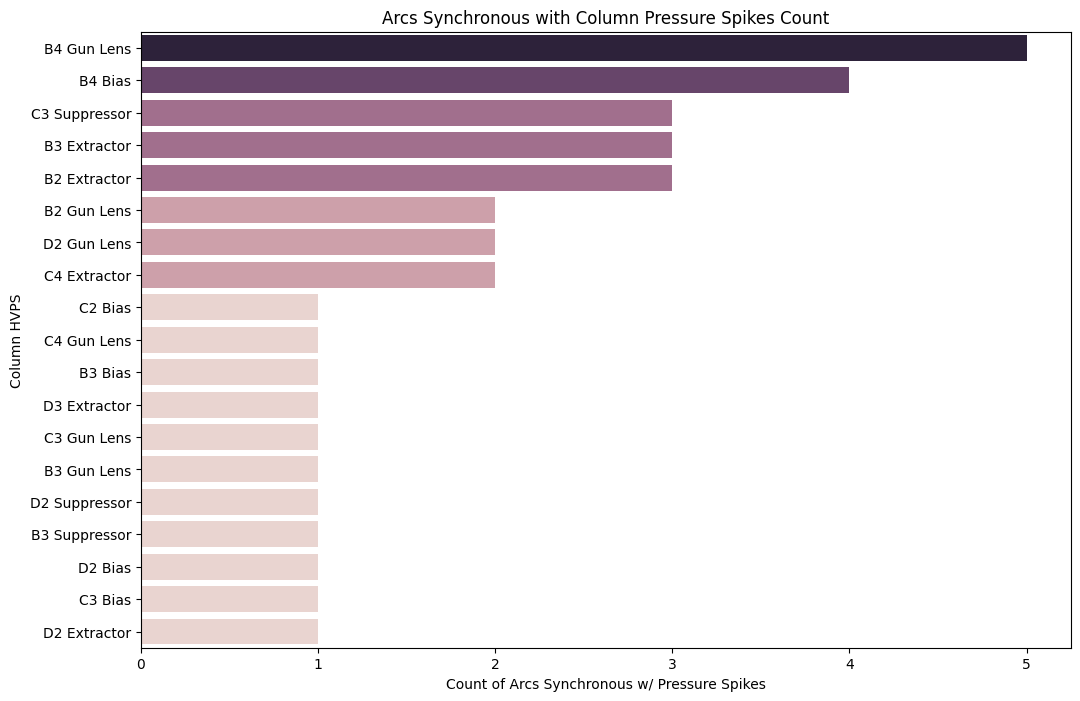

In [47]:
# PLOT COUNTS
plt.figure(figsize=(12,8))
plot = sns.barplot(data = counts_plot_df, x = 'Count of Arcs Synchronous w/ Pressure Spikes', y = 'Column HVPS', fill = True, hue = 'Count of Arcs Synchronous w/ Pressure Spikes', legend=False)
title = "Arcs Synchronous with Column Pressure Spikes Count"
plot.set_title(title)
plt.savefig(f"plots/arcs_with_pressure_spikes/{title.replace(" ", "_")}.pdf", format = 'pdf')
plt.show()

In [42]:
# PREPROCESS PERCENTS DF FOR PLOTTING
percents_plot_df = arc_column_pressure_counts_df[["Column HVPS", "Percent of Arcs Synchronous w/ Pressure Spikes"]].sort_values(by="Percent of Arcs Synchronous w/ Pressure Spikes", ascending=False)
percents_plot_df = percents_plot_df[percents_plot_df["Percent of Arcs Synchronous w/ Pressure Spikes"] > 0]
percents_plot_df

,Column HVPS,Percent of Arcs Synchronous w/ Pressure Spikes
13,B3 Suppressor,50.000000
9,B3 Extractor,42.857143
8,B3 Bias,33.333333
43,D2 Bias,33.333333
11,B3 Gun Lens,25.000000
18,B4 Gun Lens,25.000000
22,C2 Bias,20.000000
15,B4 Bias,16.666667
44,D2 Extractor,16.666667
2,B2 Extractor,13.636364


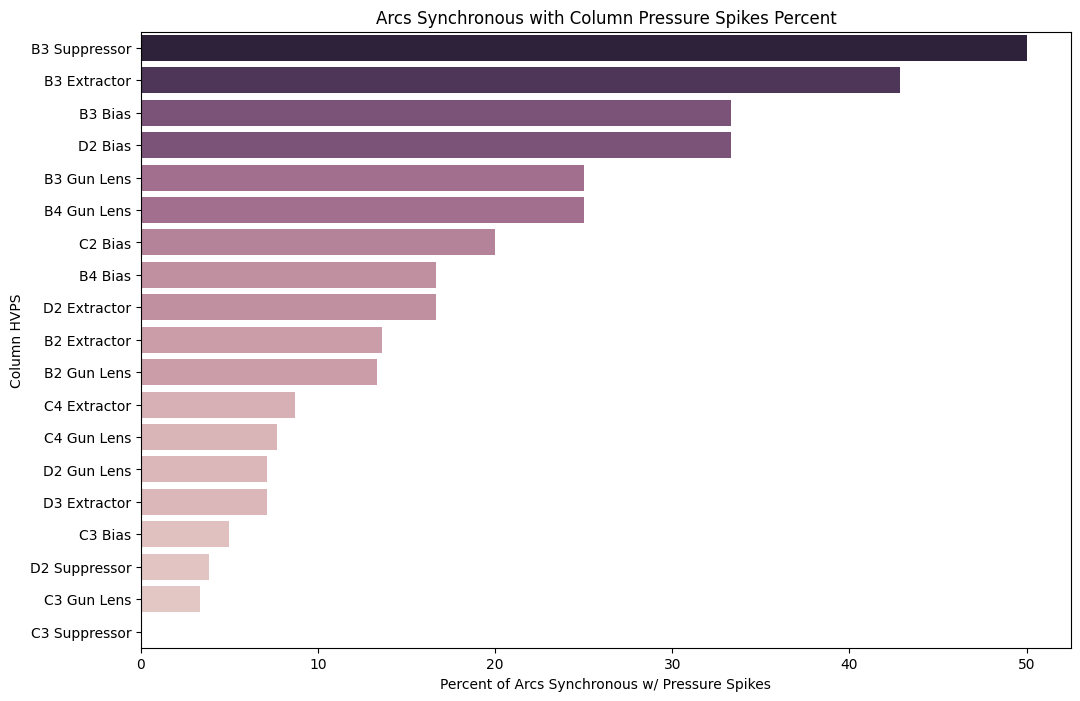

In [48]:
# PLOT PERCENTS
plt.figure(figsize=(12,8))
plot = sns.barplot(data = percents_plot_df, x = 'Percent of Arcs Synchronous w/ Pressure Spikes', y = 'Column HVPS', fill = True, hue = 'Percent of Arcs Synchronous w/ Pressure Spikes', legend=False)
title = "Arcs Synchronous with Column Pressure Spikes Percent"
plot.set_title(title)
plt.savefig(f"plots/arcs_with_pressure_spikes/{title.replace(" ", "_")}.pdf", format = 'pdf')
plt.show()

In [ ]:
# PREPROCESS DF FOR TOTAL COUNTS PLOT
total_counts_plot_df = arc_column_pressure_counts_df[["Column HVPS", "Total Arc Counts"]].sort_values(by="Total Arc Counts", ascending=False)
total_counts_plot_df = total_counts_plot_df[total_counts_plot_df["Total Arc Counts"] > 0]
total_counts_plot_df

/var/folders/f5/gym8h1y12335l6bzxp5c9pgw0000gn/T/ipykernel_26268/834302846.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data = total_counts_plot_df, x = 'Total Arc Counts', y = 'Column HVPS', fill = True, palette=palette)


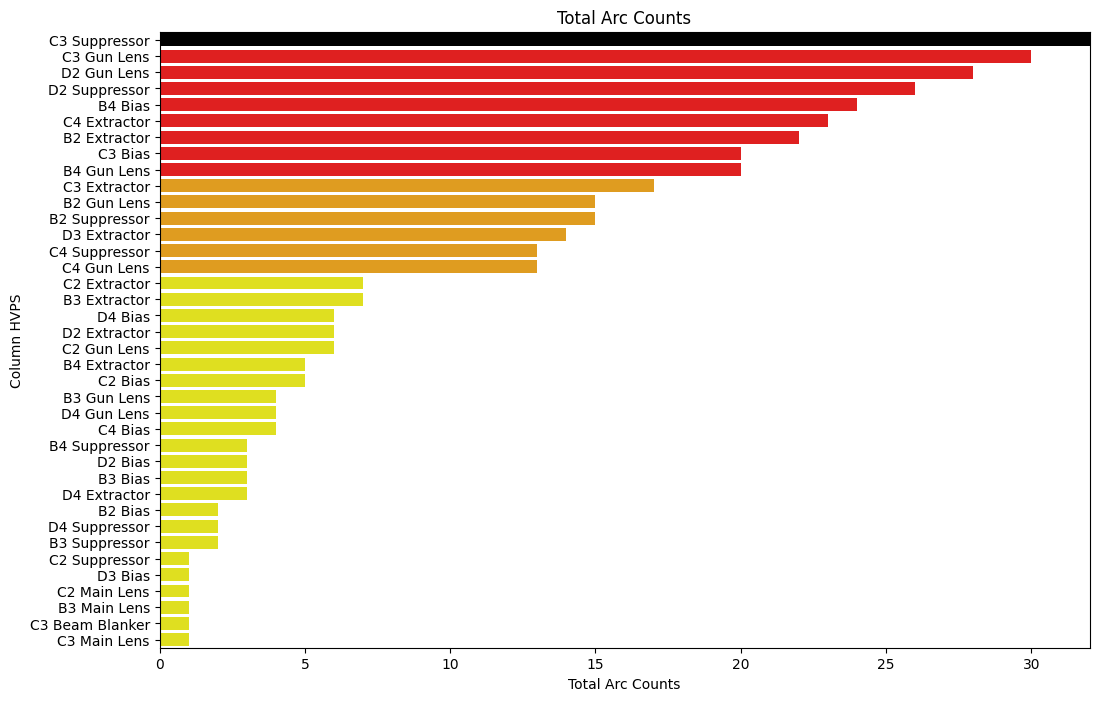

In [54]:
# PLOT TOTAL COUNTS
plt.figure(figsize=(12,8))
palette = [
    'yellow' if value < 8 
    else 'orange' if 8 <= value < 18 
    else 'red' if value < 32
    else 'black'
    for value in total_counts_plot_df["Total Arc Counts"]
]
plot = sns.barplot(data = total_counts_plot_df, x = 'Total Arc Counts', y = 'Column HVPS', fill = True, palette=palette)
title = "Total Arc Counts"
plot.set_title(title)
plot.set_xlim((0,32))
plt.savefig(f"plots/{title.replace(" ", "_")}.pdf", format = 'pdf')
plt.show()